## Principal Component Analysis

In [2]:
# Basic Python and Data processing functions
import pandas as pd
import numpy as np
import scipy as sp
import os
import sys

# Analytics and modeling
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import manifold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment
from patsy import dmatrices

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig
import missingno as msno

# Setting graphing preferences
sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

C:\Users\abhij\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\abhij\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\abhij\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Community Crime Data: Load the data

Load the community crime data: CommunityCrimeDataRaw.txt

In [3]:
# Load the data from your directory
path = r"C:\Users\abhij\Desktop\UVa Coursework\DS 6001\PCA-with-Python"
file1 = "\CommunityCrimeDataRaw.txt"
crimes_df = pd.read_csv(path + file1, header = None, na_values = '?')

In [4]:
#Ascertain the dimensions of the Crimes dataset
crimes_df.shape

(2215, 147)

There seems to be 147 columns of data and 2215 rows or accidents. Let's take a sneak-peak at the data itself

In [5]:
#Check to see if the data drame has been read in correctly
crimes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


The data do not have a header row, this is in a separate file: CrimeVariableLabels.txt

Read crime.description.txt to determine the missing value character

In [6]:
#Read in header file
header_file = '\CrimeVariableLabels.txt'
crimes_header = pd.read_csv(path+header_file, header=None)

In [7]:
#Replace headers with values in crimes_header
crimes_df.columns = crimes_header.loc[:,0]
crimes_df.head(5)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


## Data Cleaning

Remove the non-predictor/response variables (see 
http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)

In [8]:
#Get rid of non predictor variables
crimes_df.drop(['communityname', 'state', 'countyCode', 'communityCode','fold'], axis = 1, inplace = True)

crimes_df.shape

(2215, 142)

In [9]:
crimes_df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


Find the missing vlaues column wise to understand the quality and information each variable in the data set brings

In [ ]:
#Lets find out how many missing values we have in each column
col_list = dict(crimes_df.loc[:,crimes_df.isnull().sum()>0].isnull().sum())

Since we can see quite a few columns which have missing values greater than 220 or ~10% of the dataset, we can visualize the remaining ones

In [60]:
#Select columns that have greater than 220 missing values
col_list1 = list(dict((k, int(v)>220) for k, v in col_list.items()).keys())

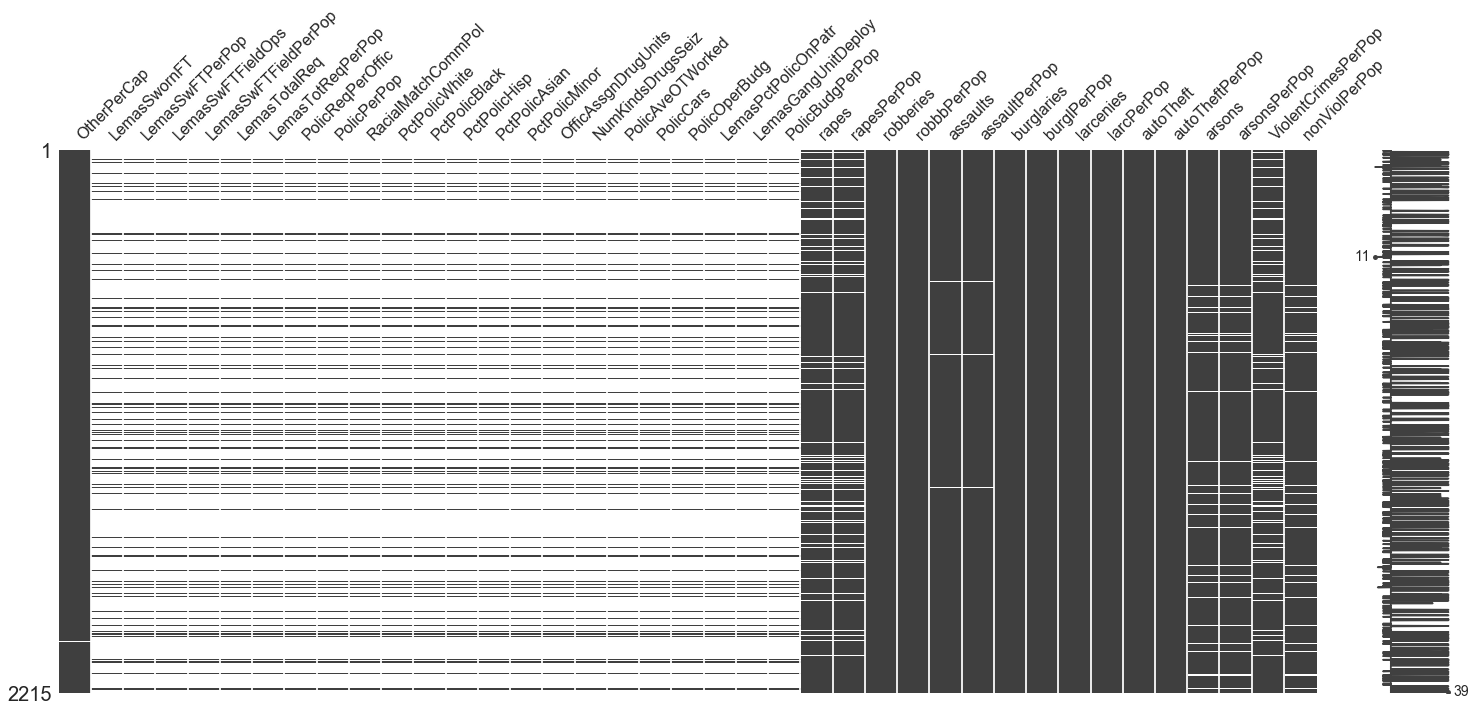

In [58]:
#Visualize missing values in columns
msno.matrix(crimes_df[col_list1])

Since we have expendable columns with more missing values than information, we can leave them out in this analysis. We'll drop any column with more than 1000

In [61]:
#Removing variables with greater than 1000 missing
crimes_df.dropna(axis=1, thresh=1215,inplace=True)

crimes_df.shape

(2215, 120)

Imputation for the missing values. We usse the native TransformerMixin from SciKitLearn

In [63]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        
        Columns of dtype floating point are imputed with the mean.

        Columns of other types are imputed with median of the column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') 
                               else X[c].mean() if X[c].dtype == np.dtype('f')
                                else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [65]:
#Imputation
crimes_df = DataFrameImputer().fit_transform(crimes_df)
crimes_df.isnull().sum().head()

0
population       0
householdsize    0
racepctblack     0
racePctWhite     0
racePctAsian     0
dtype: int64

In [66]:
#Saving the clean data set
file = "CrimeDataClean.csv"
crimes_df.to_csv(path + file, index=False)

### Predictor and Response Variables

- Determine which variables are predictors and which are responses
- Further clean the response variables
- Visualize response variables to get a better sense of their behavior


This part of the process almost always glossed over. Personally, this is the mosst important part of this analysis. Variable selection can make or break an exploration, model or prediction. Using the previous information about each column, we get to undersatnd why each column in a binary sense is a predictor or response.

In [67]:
# Looking at all variables and deciding which are predictors and which are response using external resources 
print(crimes_df.columns[:50])
print(crimes_df.columns[51:100])
print(crimes_df.columns[101:])

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar'],
      dtype='object', name=0)
Index(['NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentIm

It's clear that the variables before "murders" are all potentially predictors for rates and counts in murders and those after that. We can easily subset the data frame using murders as our slcing point

In [68]:
#Description of response variables
crimes_df.loc[:,'murders':].describe()

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.00000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,7.764786,5.859296,26.069977,35.381549,237.853273,162.572953,324.940406,377.11556,760.483521,1033.144810,2135.745824,3372.581675,516.094357,473.733199,29.843341,31.698736,567.625567,4887.099228
std,58.166468,9.156829,100.719961,32.705405,2250.217247,234.441088,1982.210768,437.10334,3109.661160,762.876468,7595.594541,1900.058222,3255.996607,504.363503,176.459623,38.488835,586.844780,2680.842377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,0.000000,0.000000,3.000000,13.390000,5.000000,27.655000,18.500000,94.75000,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.985000,185.280000,2994.265000
50%,1.000000,2.170000,7.000000,26.920000,19.000000,74.800000,56.000000,226.52500,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,3.000000,8.365000,17.000000,48.705000,70.000000,187.150000,178.500000,502.61500,507.500000,1348.670000,1673.000000,4334.675000,231.500000,589.225000,15.000000,41.435000,722.000000,6100.870000
max,1946.000000,91.090000,2818.000000,401.350000,86001.000000,2264.130000,62778.000000,4932.50000,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [92]:
#Removing raw crime counts and just use per pop and keep the last two

#Starting with response variable
response_start = crimes_df.columns.get_loc('murders')

#list of per pop columns
cols = list(range(response_start+1, 118, 2))

#adding last two response variables
cols.extend([118,119])

#Final list
crimes_df.columns[cols]

Index(['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop',
       'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop'],
      dtype='object', name=0)

In [49]:
#Data frame of response variables
crimes_response_df = crimes_df[crimes_df.columns[cols]]

crimes_response_df.describe()

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.00000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.859296,35.381549,162.572953,377.11556,1033.144810,3372.581675,473.733199,31.698736,567.625567,4887.099228
std,9.156829,32.705405,234.441088,437.10334,762.876468,1900.058222,504.363503,38.488835,586.844780,2680.842377
min,0.000000,0.000000,0.000000,0.00000,16.920000,77.860000,6.550000,0.000000,0.000000,116.790000
25%,0.000000,13.390000,27.655000,94.75000,512.185000,2040.740000,157.060000,7.985000,185.280000,2994.265000
50%,2.170000,26.920000,74.800000,226.52500,822.715000,3079.510000,302.355000,21.080000,374.060000,4425.450000
75%,8.365000,48.705000,187.150000,502.61500,1348.670000,4334.675000,589.225000,41.435000,722.000000,6100.870000
max,91.090000,401.350000,2264.130000,4932.50000,11881.020000,25910.550000,4968.590000,436.370000,4877.060000,27119.760000


## Scaling Response and Predictor Variables
Min-Max scale the response variables between 0 and 100.

Min-Max scale the predictors between 0 and 100 (do this only for non percentage predictors)

In [50]:
#Scaling response variables 0 to 100
#this is required for the PCA

from sklearn.preprocessing import MinMaxScaler

cols = crimes_response_df.columns

scaler = MinMaxScaler(feature_range=(0,100))

response_scaled_df = \
pd.DataFrame(scaler.fit_transform(crimes_response_df), columns = cols)

response_scaled_df.describe()

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,6.432425,8.815634,7.180372,7.645526,8.565545,12.754079,9.415144,7.264188,11.638683,17.665869
std,10.052507,8.148849,10.354577,8.861700,6.430125,7.355247,10.164438,8.820229,12.032757,9.927954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.336240,1.221440,1.920933,4.174484,7.598434,3.033228,1.829869,3.799010,10.656143
50%,2.382259,6.707363,3.303697,4.592499,6.791876,11.619580,5.961359,4.830763,7.669785,15.956245
75%,9.183225,12.135293,8.265868,10.189863,11.225040,16.478404,11.742650,9.495382,14.804001,22.160822
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


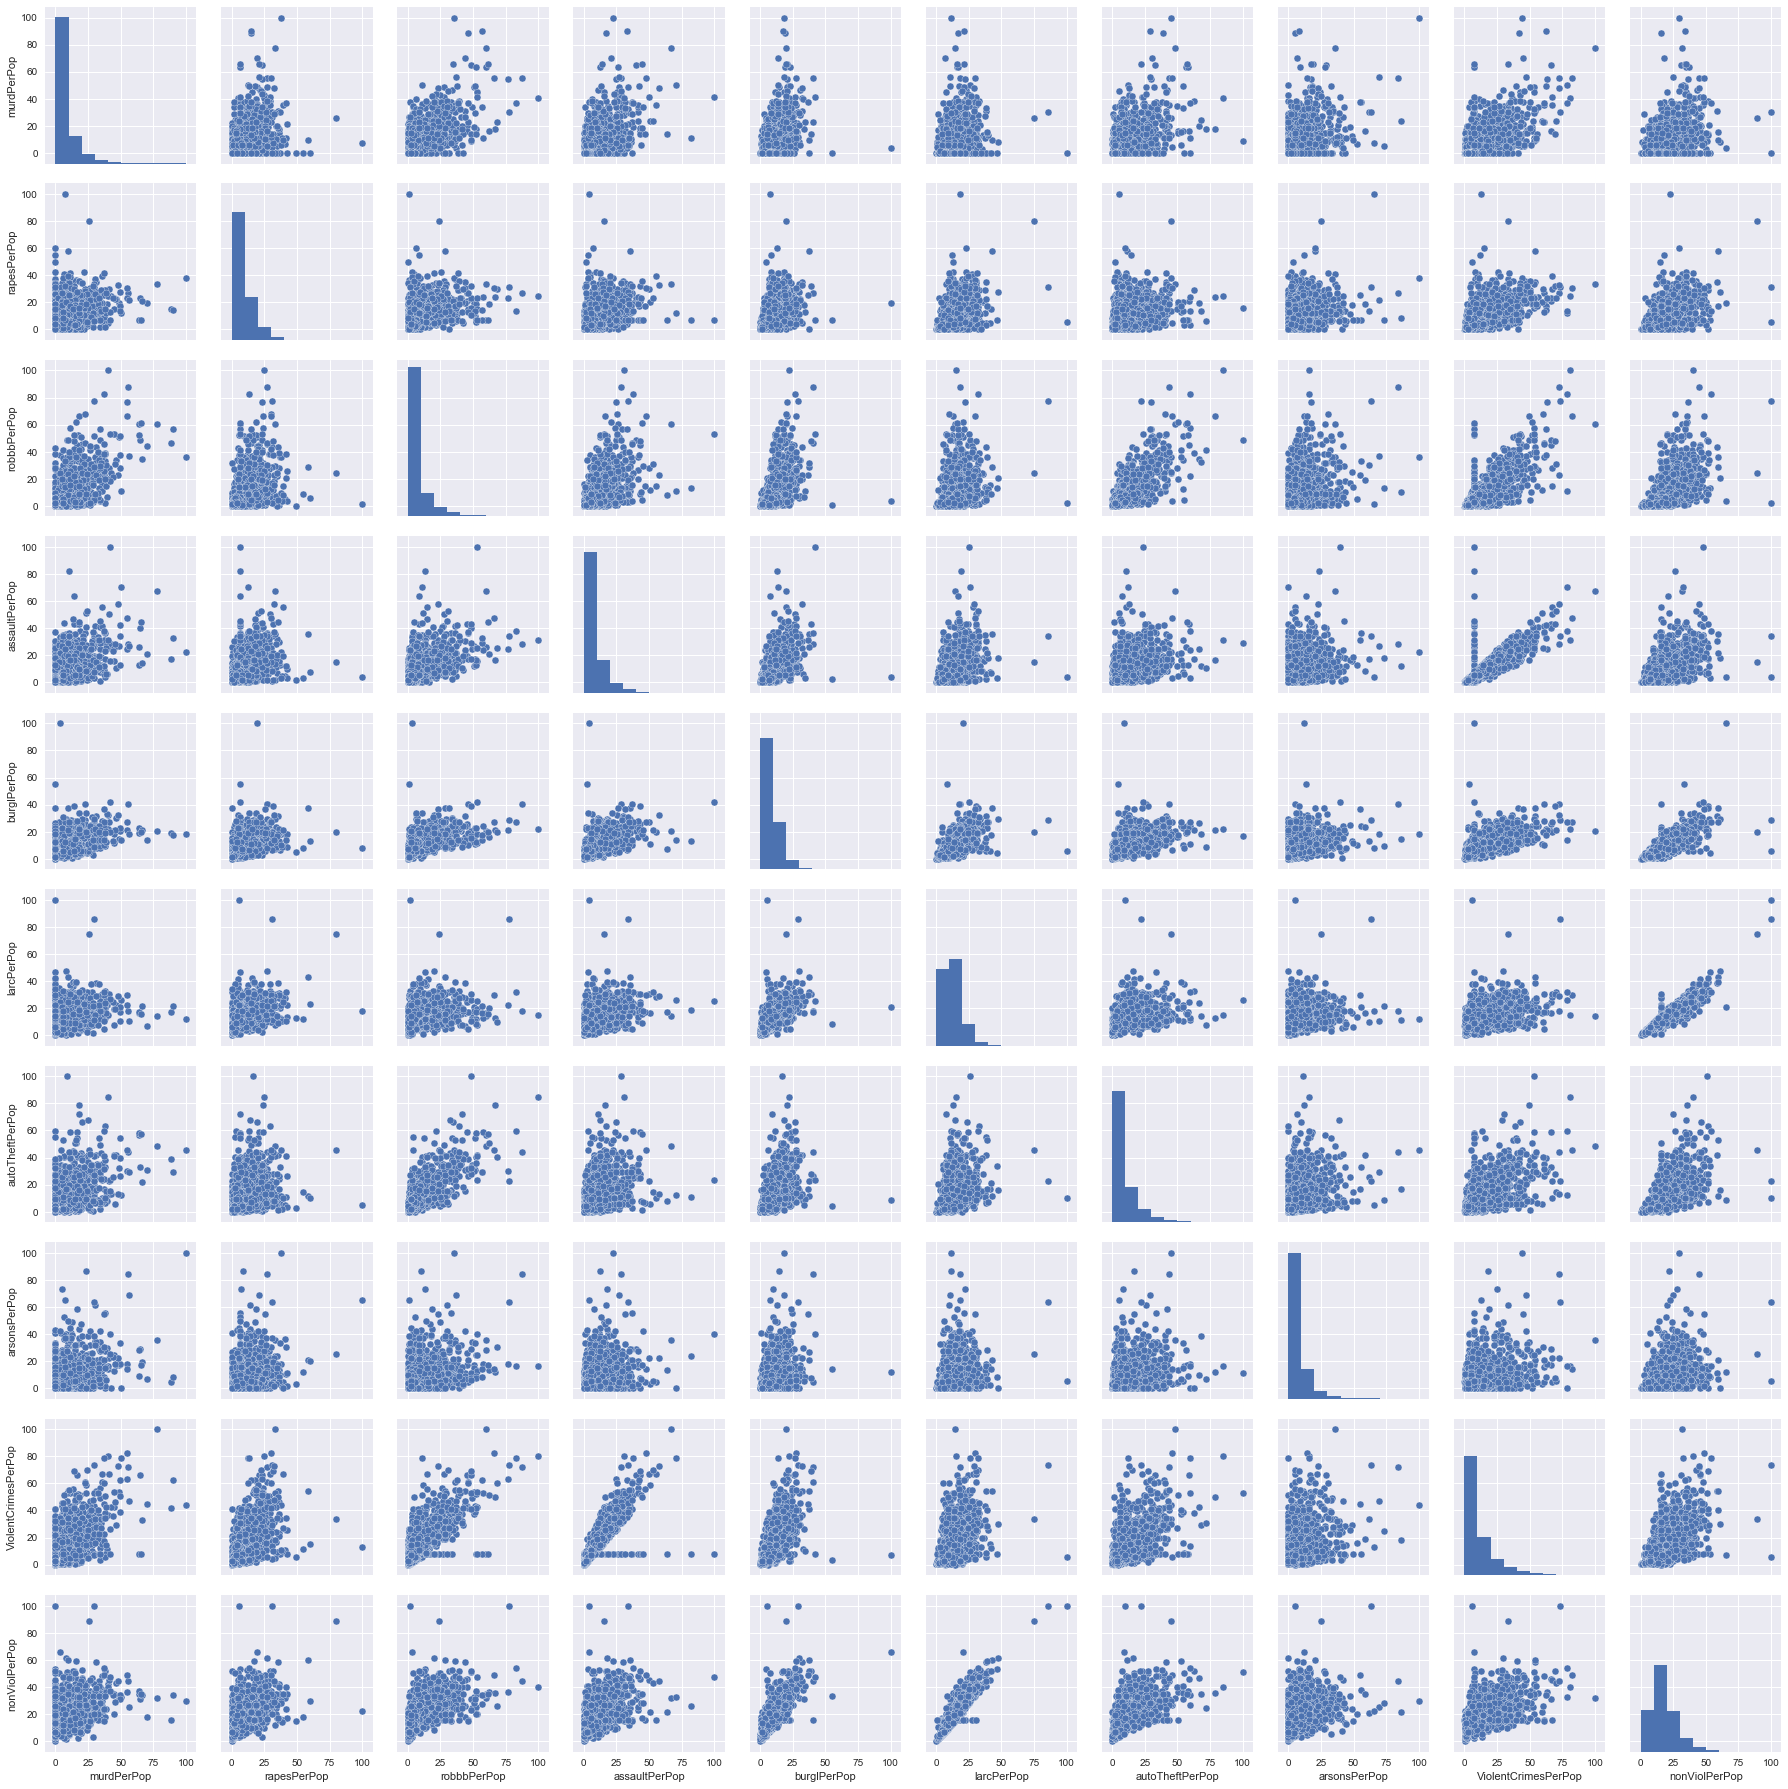

In [51]:
# Scatter Plot Matrix (SPM) of response variables

sns.pairplot(response_scaled_df)

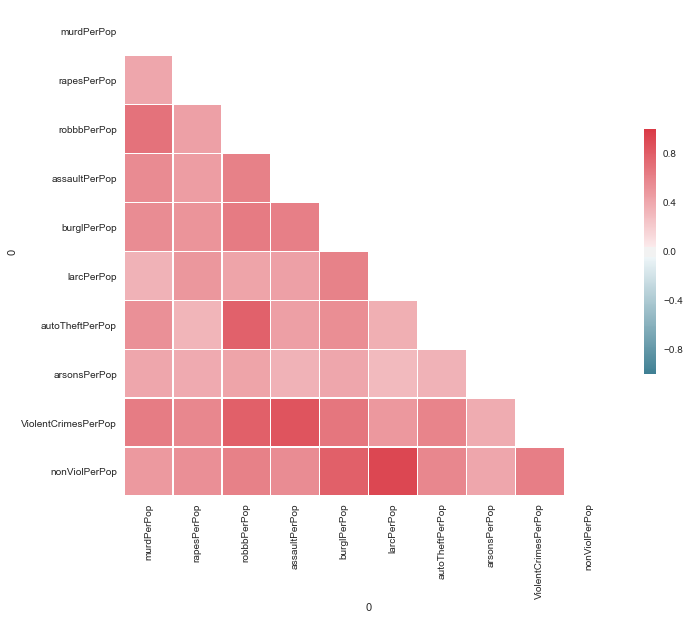

In [52]:
# Heat map to show correlations

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = response_scaled_df.corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
crimes_df.loc[:,:'PctSameState85'].describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,26.298104,20.990158,13.010203,66.953499,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,2.979297,2.987622,1.419679,564.253149,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,14.900000,14.000000,10.100000,0.000000,0.000000,0.180000,6.750000,11.830000,27.950000,32.830000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,24.300000,18.700000,12.000000,0.000000,0.000000,2.060000,50.110000,44.995000,72.060000,85.200000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,26.100000,21.000000,12.800000,0.000000,0.000000,4.310000,64.490000,52.170000,79.490000,90.030000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,28.000000,23.100000,13.700000,22.000000,1.000000,9.250000,74.855000,58.740000,85.135000,93.010000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,35.100000,32.700000,23.400000,23383.000000,10447.000000,60.400000,93.140000,78.560000,96.590000,99.900000


In [54]:
#Create a DF with predictors

crimes_predictors_df = crimes_df.loc[:,:'LemasPctOfficDrugUn']
crimes_predictors_df.shape

(2215, 102)

In [55]:
crimes_predictors_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,0.000000,0.180000,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,0.000000,2.060000,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,0.000000,4.310000,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,1.000000,9.250000,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,10447.000000,60.400000,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000


In [56]:
#Get variables with max values > 1000 and the others

preds2scale = crimes_predictors_df.columns[crimes_predictors_df.apply('max', axis = 0)>1e3]
preds2notscale = crimes_predictors_df.columns[crimes_predictors_df.apply('max', axis = 0)<=1e3]

print(preds2scale)
print(preds2notscale)

Index(['population', 'numbUrban', 'medIncome', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'NumKidsBornNeverMar',
       'NumImmig', 'HousVacant', 'MedYrHousBuilt', 'OwnOccLowQuart',
       'OwnOccMedVal', 'OwnOccHiQuart', 'OwnOccQrange', 'RentLowQ',
       'RentMedian', 'RentHighQ', 'MedRent', 'NumInShelters', 'NumStreet',
       'LandArea', 'PopDens'],
      dtype='object', name=0)
Index(['householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       

In [57]:
#Scaling predictors with large values >1k

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,100))

scaled_df = \
pd.DataFrame(scaler.fit_transform(crimes_predictors_df[preds2scale]), columns = preds2scale)

scaled_df.describe()

,population,numbUrban,medIncome,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,...,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,MedRent,NumInShelters,NumStreet,LandArea,PopDens
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,0.589575,0.651885,21.888215,22.876343,17.853310,17.507177,5.441142,2.547748,13.401770,6.892115,...,24.823656,17.106482,25.606052,35.021254,42.155412,38.252950,0.286334,0.170609,0.743085,6.272821
std,2.798203,2.807851,11.698150,11.085170,10.818150,10.014264,4.352302,3.094549,9.307461,5.784468,...,20.989975,11.814652,15.979874,19.376464,24.333429,20.923577,2.413091,2.349503,3.077211,6.397557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.059637,0.000000,13.028172,14.849760,10.962714,11.263372,3.178625,1.321875,7.804361,4.035401,...,9.771069,9.728097,12.694013,19.239501,22.466422,21.260816,0.000000,0.000000,0.179327,2.650164
50%,0.174864,0.246375,19.671660,20.403544,15.265651,15.148790,4.609183,2.061458,11.538643,5.975182,...,16.638371,13.111782,23.059867,31.441544,37.118437,33.992583,0.000000,0.000000,0.358654,4.561973
75%,0.451538,0.572450,28.419993,28.431639,21.627486,20.728802,6.848011,3.074479,16.321292,8.412409,...,33.870212,19.773414,35.698448,48.127128,58.302808,52.286774,0.094085,0.009572,0.706100,7.489162
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [58]:
#Joining both data frames

crimes_scaled_preds_df = pd.concat([scaled_df, crimes_predictors_df[preds2notscale]], axis=1)

crimes_scaled_preds_df.shape

(2215, 102)

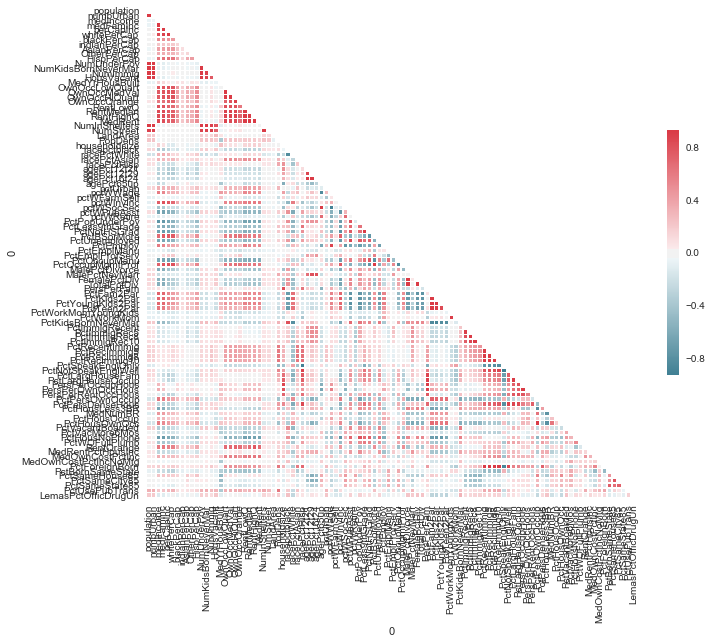

In [59]:
# Heat map to show correlations for predictor variables

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = crimes_scaled_preds_df.corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### In-Class Exercise 4 - Principal Component Analysis on the Response Variables

- Obtain the principal components for the response variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components

In [60]:
############
## perform PCA on the response variables

n = len(response_scaled_df.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_response_pca = pca.fit_transform(response_scaled_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_response_pca.shape


Percent of explained variance (first two components): 71


(2215, 10)

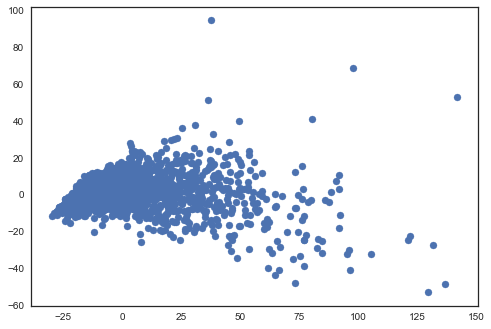

In [61]:
# # PCA scatter plot

plt.scatter(crimes_response_pca[:,0],crimes_response_pca[:,1])


In [62]:
# Towns/communities with > 0 reported murders.

murder_towns = crimes_df.murdPerPop > 0
murder_towns


0       False
1       False
2        True
3       False
4       False
5        True
6       False
7        True
8       False
9        True
10       True
11       True
12       True
13       True
14      False
15      False
16       True
17       True
18      False
19       True
20      False
21       True
22       True
23      False
24      False
25      False
26       True
27       True
28       True
29       True
        ...  
2185     True
2186     True
2187    False
2188    False
2189     True
2190    False
2191     True
2192     True
2193     True
2194    False
2195     True
2196     True
2197    False
2198    False
2199    False
2200     True
2201     True
2202    False
2203     True
2204    False
2205     True
2206    False
2207    False
2208    False
2209    False
2210     True
2211    False
2212     True
2213    False
2214     True
Name: murdPerPop, Length: 2215, dtype: bool

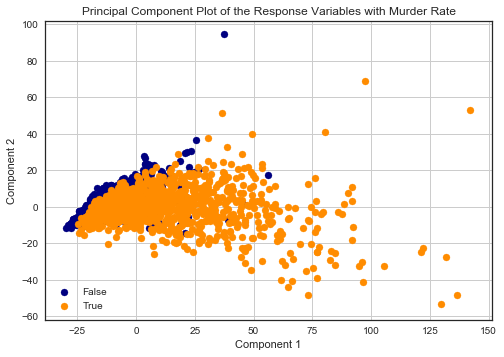

In [63]:
# PCA plot with labels for murder towns
colors = ['navy', 'darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True], colors):
        ax.scatter(crimes_response_pca[murder_towns == i, 0],
                   crimes_response_pca[murder_towns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Response Variables with Murder Rate')


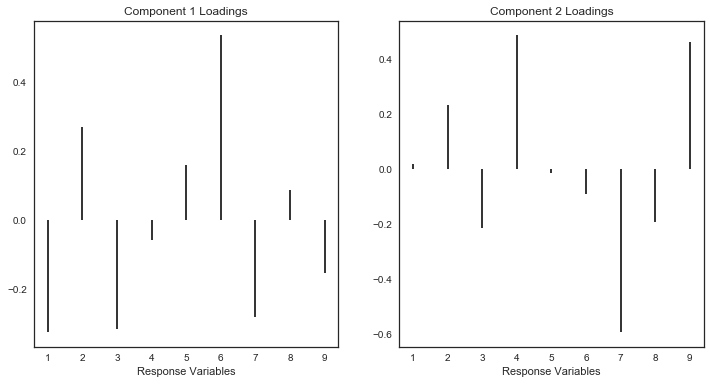

In [64]:
# PCA loadings
# Response Variables PCA

fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[1,:])
Comp1.set_xlabel('Response Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[2,:])
Comp2.set_xlabel('Response Variables')
Comp2.set_title('Component 2 Loadings')


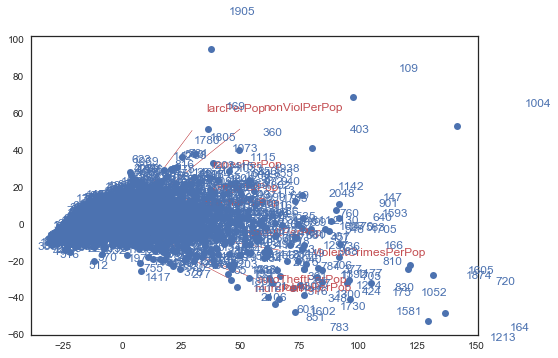

In [65]:
# # The biplot like the one in R
# # This will take a while to run

# ## project data into PC space
# first 2 PC

pca = PCA(n_components=2)
crimes_response_pca = pca.fit_transform(response_scaled_df)
# # 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = crimes_response_pca[:,0] # see 'prcomp(my_data)$x' in R
ys = crimes_response_pca[:,1]

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(response_scaled_df.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project observations (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2,
             list(response_scaled_df.index)[i], color='b')



### In-Class Exercise 4 - Principal Component Analysis on the Predictor Variables

- Obtain the principal components for the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

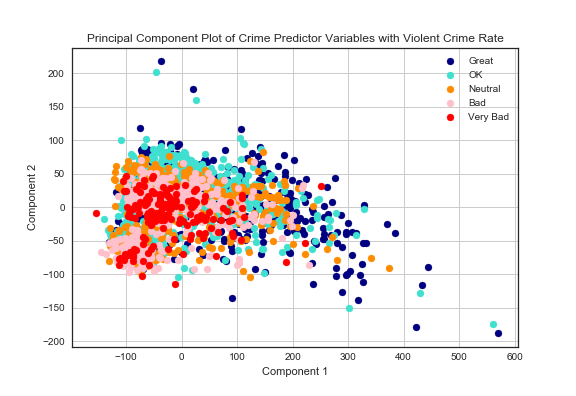


In [66]:
#Joining both data frames

crimes_scaled_preds_df = pd.concat([scaled_df, crimes_predictors_df[preds2notscale]], axis=1)

crimes_scaled_preds_df.shape

(2215, 102)

In [67]:
############
## perform PCA on the scaled variables

n = len(crimes_scaled_preds_df.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_scaled_pca = pca.fit_transform(crimes_scaled_preds_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_scaled_pca.shape

Percent of explained variance (first two components): 64


(2215, 102)

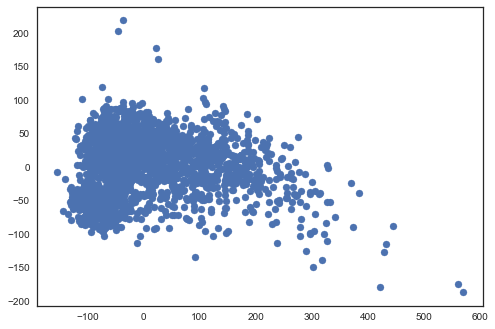

In [68]:
# # PCA scatter plot for scaled df

plt.scatter(crimes_scaled_pca[:,0],crimes_scaled_pca[:,1])

In [69]:
# Towns/communities with > 0 reported murders.

murder_towns = crimes_df.murdPerPop > 0

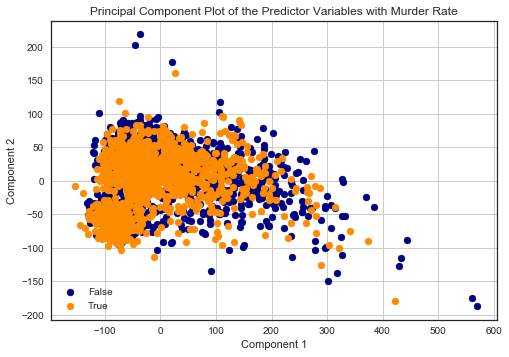

In [70]:
# PCA plot with labels for murder towns
colors = ['navy', 'darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True], colors):
        ax.scatter(crimes_scaled_pca[murder_towns == i, 0],
                   crimes_scaled_pca[murder_towns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Predictor Variables with Murder Rate')

In [71]:
#Joining both data frames

crimes_scaled_preds_df = pd.concat([scaled_df, crimes_predictors_df[preds2notscale]], axis=1)

crimes_scaled_preds_df.shape

(2215, 102)

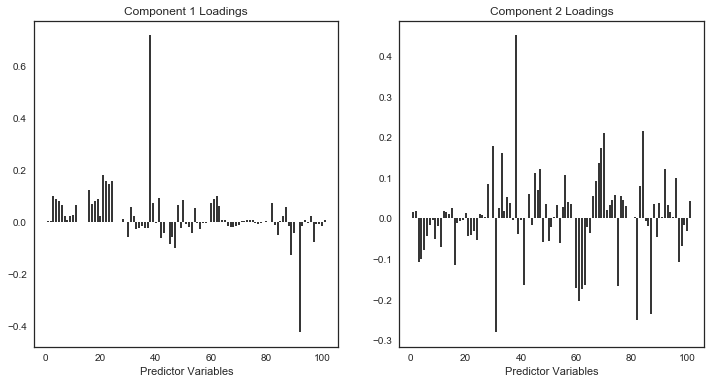

In [72]:
# PCA loadings
# Response Variables PCA

fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,len(crimes_scaled_preds_df.columns)), [0],pca.components_[1,:])
Comp1.set_xlabel('Predictor Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,len(crimes_scaled_preds_df.columns)), [0],pca.components_[2,:])
Comp2.set_xlabel('Predictor Variables')
Comp2.set_title('Component 2 Loadings')

In [73]:
#Joining both data frames

crimes_scaled_preds_df = pd.concat([scaled_df, crimes_predictors_df[preds2notscale]], axis=1)

crimes_scaled_preds_df.shape

(2215, 102)

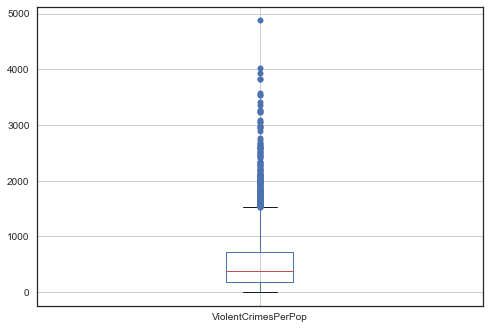

In [74]:
#Overlay the violent crime rate binned using the box plot statistics

violentbox = crimes_response_df.boxplot(column = "ViolentCrimesPerPop", return_type = 'dict', sym = 'b')
violentbox_stats = [violentbox["whiskers"][0].get_ydata()[1],violentbox["boxes"][0].get_ydata()[0],
                    violentbox["medians"][0].get_ydata()[0],violentbox["boxes"][0].get_ydata()[2],
                    violentbox["whiskers"][1].get_ydata()[1] ]


In [77]:
#Create Bins for Violent Crimes
bins = violentbox_stats
bins.append(crimes_response_df['ViolentCrimesPerPop'].max())
bins

[0.0, 185.28, 374.06, 722.0, 1523.9200000000001, 4877.0600000000004]

In [80]:
#Create labels to cut on
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

#Create Binned vector 
ViolentTowns = pd.cut(crimes_response_df['ViolentCrimesPerPop'], bins,labels =crime_labels)

#Overlay at least one other crime rate binned using the box plot statistics
crimes_scaled_preds_df.shape

(2215, 102)

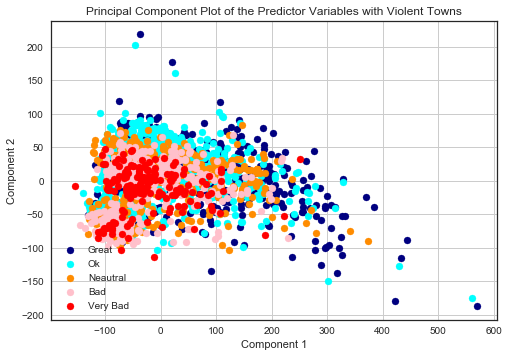

In [81]:
# PCA plot with labels for crime rate
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_pca[ViolentTowns == i, 0],
                   crimes_scaled_pca[ViolentTowns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Predictor Variables with Violent Towns')

In [1]:
#Overlay the non-violent crime rate binned using the box plot statistics
nonviolentbox = crimes_response_df.boxplot(column = "nonViolPerPop", return_type = 'dict', sym = 'b')
nonviolentbox_stats = [nonviolentbox["whiskers"][0].get_ydata()[1],nonviolentbox["boxes"][0].get_ydata()[0],
                    nonviolentbox["medians"][0].get_ydata()[0],nonviolentbox["boxes"][0].get_ydata()[2],
                    nonviolentbox["whiskers"][1].get_ydata()[1] ]

NameError: name 'crimes_response_df' is not defined

In [83]:
#Create Bins for Non-Violent Crimes
bins = nonviolentbox_stats
bins.append(crimes_response_df['nonViolPerPop'].max())
bins

[116.79000000000001,
 2994.2650000000003,
 4425.4500000000007,
 6100.8699999999999,
 10739.530000000001,
 27119.759999999998]

In [84]:
#Create a list of labels to cut on 
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

In [85]:
#Create Non violent bins to vizualize
NonViolentTowns = pd.cut(crimes_response_df['nonViolPerPop'], bins,labels =crime_labels)

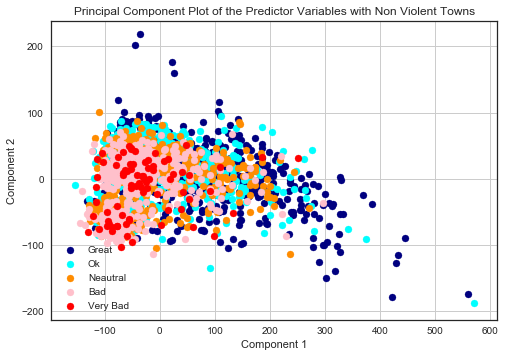

In [86]:
# PCA plot with labels for crime rate
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_pca[NonViolentTowns == i, 0],
                   crimes_scaled_pca[NonViolentTowns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Predictor Variables with Non Violent Towns')

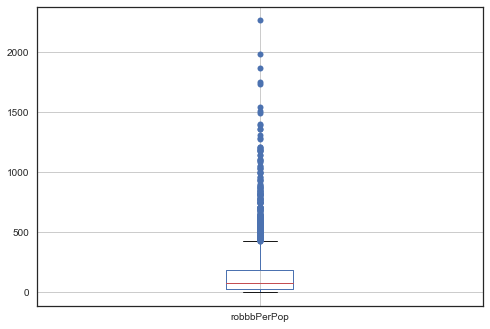

In [87]:
#Overlay the non-violent robbery rate binned using the box plot statistics
robbersbox = crimes_response_df.boxplot(column = "robbbPerPop", return_type = 'dict', sym = 'b')
robbersbox_stats = [robbersbox["whiskers"][0].get_ydata()[1],robbersbox["boxes"][0].get_ydata()[0],
                    robbersbox["medians"][0].get_ydata()[0],robbersbox["boxes"][0].get_ydata()[2],
                    robbersbox["whiskers"][1].get_ydata()[1] ]

In [88]:
#Create Bins for robbery rate and labels to cut on
bins = robbersbox_stats
bins.append(crimes_response_df['robbbPerPop'].max())
bins

[0.0,
 27.655000000000001,
 74.799999999999997,
 187.14999999999998,
 425.92000000000002,
 2264.1300000000001]

In [89]:
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

In [90]:
RobberiesPerPop = pd.cut(crimes_response_df['robbbPerPop'], bins,labels =crime_labels)

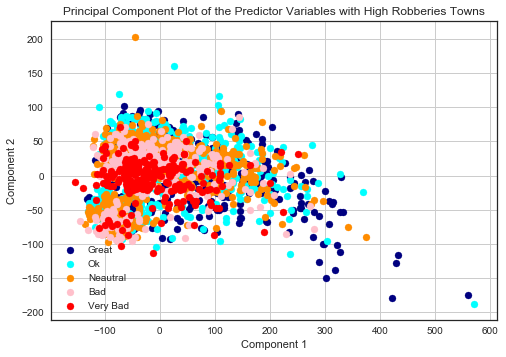

In [91]:
# PCA plot with labels for crime rate
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_pca[RobberiesPerPop == i, 0],
                   crimes_scaled_pca[RobberiesPerPop == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Predictor Variables with High Robberies Towns')

### In-Class Exercise 5 - Principal Component Analysis on the Log Transformation of the Predictor Variables

- Obtain the principal components for the log transformation of the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

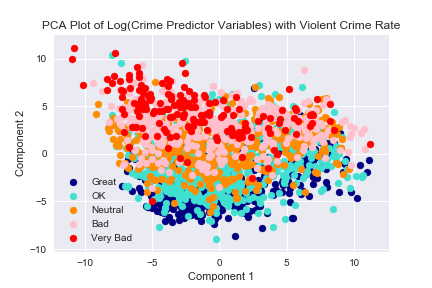

In [121]:
#Log transform scaled predictors
logpreds = np.log(crimes_scaled_preds_df+1)

In [93]:
############
## perform PCA on the log scaled variables

n = len(logpreds.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_scaled_log_pca = pca.fit_transform(logpreds)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_scaled_log_pca.shape

Percent of explained variance (first two components): 50


(2215, 102)

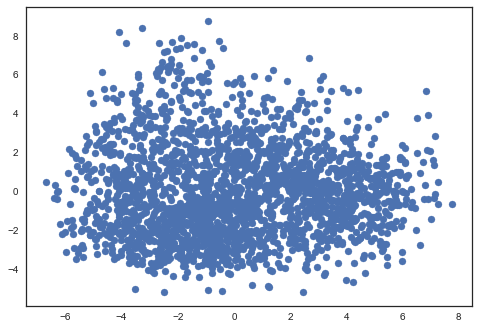

In [94]:
# # PCA scatter plot

plt.scatter(crimes_scaled_log_pca[:,0],crimes_scaled_log_pca[:,1])

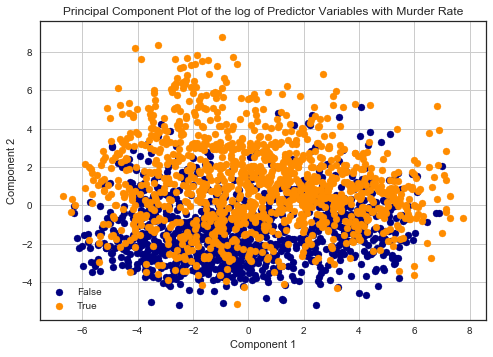

In [95]:
# PCA plot with labels for murder towns
colors = ['navy', 'darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True], colors):
        ax.scatter(crimes_scaled_log_pca[murder_towns == i, 0],
                   crimes_scaled_log_pca[murder_towns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the log of Predictor Variables with Murder Rate')

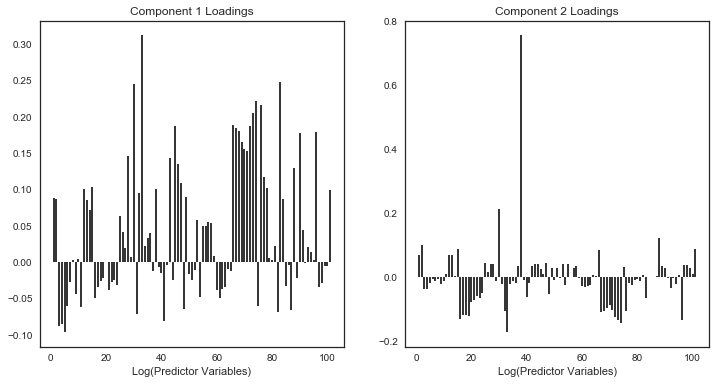

In [96]:
# PCA loadings
# log trarnsformed Variables PCA

fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,len(logpreds.columns)), [0],pca.components_[1,:])
Comp1.set_xlabel('Log(Predictor Variables)')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,len(logpreds.columns)), [0],pca.components_[2,:])
Comp2.set_xlabel('Log(Predictor Variables)')
Comp2.set_title('Component 2 Loadings')

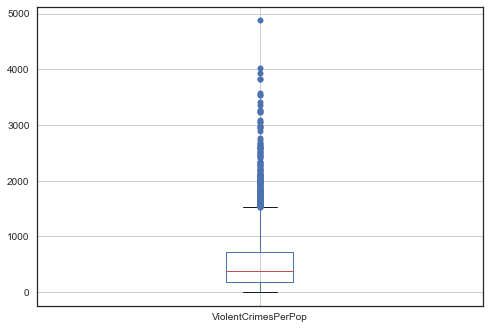

In [97]:
#Overlay the violent crime rate binned using the box plot statistics

violentbox = crimes_response_df.boxplot(column = "ViolentCrimesPerPop", return_type = 'dict', sym = 'b')
violentbox_stats = [violentbox["whiskers"][0].get_ydata()[1],violentbox["boxes"][0].get_ydata()[0],
                    violentbox["medians"][0].get_ydata()[0],violentbox["boxes"][0].get_ydata()[2],
                    violentbox["whiskers"][1].get_ydata()[1] ]


In [98]:
#Create Bins and labels to vizualize Violent crimes
bins = violentbox_stats
bins.append(crimes_response_df['ViolentCrimesPerPop'].max())
bins

[0.0, 185.28, 374.06, 722.0, 1523.9200000000001, 4877.0600000000004]

In [99]:
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

In [100]:
ViolentTowns = pd.cut(crimes_response_df['ViolentCrimesPerPop'], bins,labels =crime_labels)

In [101]:
#Overlay at least one other crime rate binned using the box plot statistics
crimes_scaled_preds_df.shape

(2215, 102)

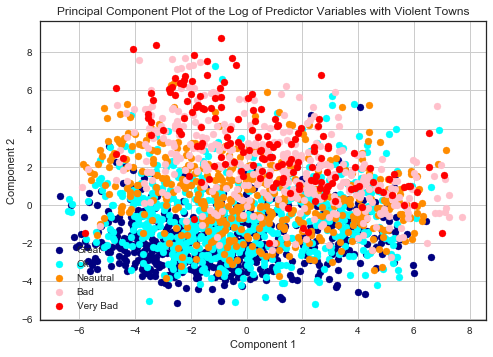

In [102]:
# PCA plot with labels for Violence rate
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_log_pca[ViolentTowns == i, 0],
                   crimes_scaled_log_pca[ViolentTowns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Log of Predictor Variables with Violent Towns')

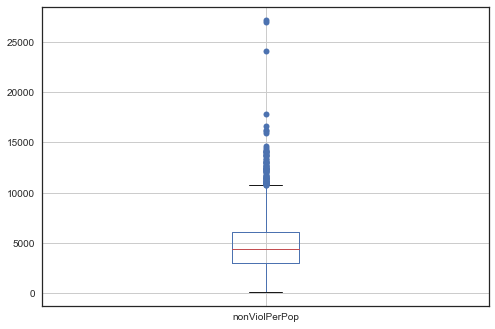

In [103]:
#Overlay the non-violent crime rate binned using the box plot statistics
nonviolentbox = crimes_response_df.boxplot(column = "nonViolPerPop", return_type = 'dict', sym = 'b')
nonviolentbox_stats = [nonviolentbox["whiskers"][0].get_ydata()[1],nonviolentbox["boxes"][0].get_ydata()[0],
                    nonviolentbox["medians"][0].get_ydata()[0],nonviolentbox["boxes"][0].get_ydata()[2],
                    nonviolentbox["whiskers"][1].get_ydata()[1] ]

In [104]:
#Create bins and labels to cut on
bins = nonviolentbox_stats
bins.append(crimes_response_df['nonViolPerPop'].max())
bins

[116.79000000000001,
 2994.2650000000003,
 4425.4500000000007,
 6100.8699999999999,
 10739.530000000001,
 27119.759999999998]

In [105]:
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

In [106]:
NonViolentTowns = pd.cut(crimes_response_df['nonViolPerPop'], bins,labels =crime_labels)

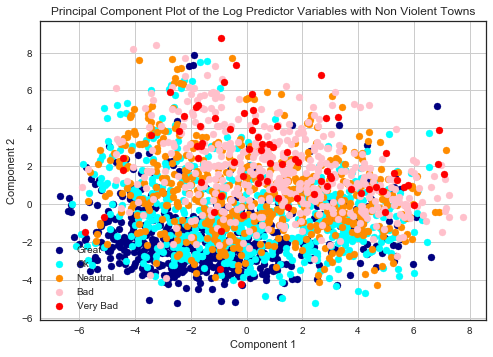

In [107]:
# PCA plot with labels for Non violent towns
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_log_pca[NonViolentTowns == i, 0],
                   crimes_scaled_log_pca[NonViolentTowns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Log Predictor Variables with Non Violent Towns')

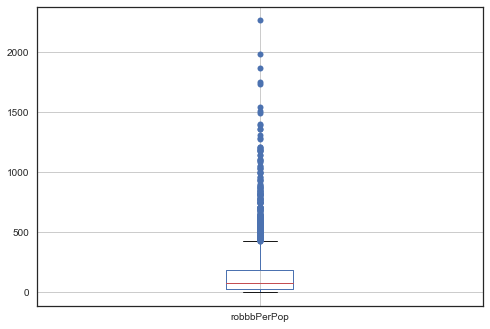

In [108]:
#Overlay the non-violent crime rate binned using the box plot statistics
robbersbox = crimes_response_df.boxplot(column = "robbbPerPop", return_type = 'dict', sym = 'b')
robbersbox_stats = [robbersbox["whiskers"][0].get_ydata()[1],robbersbox["boxes"][0].get_ydata()[0],
                    robbersbox["medians"][0].get_ydata()[0],robbersbox["boxes"][0].get_ydata()[2],
                    robbersbox["whiskers"][1].get_ydata()[1] ]

In [109]:
bins = robbersbox_stats
bins.append(crimes_response_df['robbbPerPop'].max())
bins

[0.0,
 27.655000000000001,
 74.799999999999997,
 187.14999999999998,
 425.92000000000002,
 2264.1300000000001]

In [110]:
crime_labels = ['Great','Ok','Neautral','Bad','Very Bad']

In [111]:
RobberiesPerPop = pd.cut(crimes_response_df['robbbPerPop'], bins,labels =crime_labels)

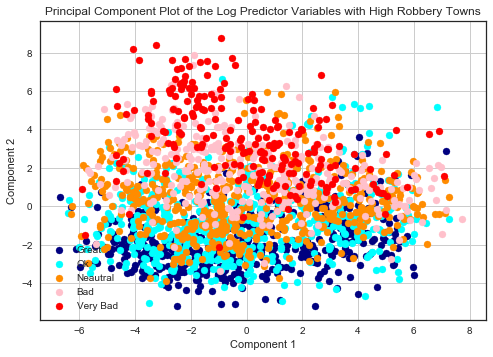

In [112]:
# PCA plot with labels for crime rate
colors = ['navy', 'aqua', 'darkorange', 'pink', 'red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_scaled_log_pca[RobberiesPerPop == i, 0],
                   crimes_scaled_log_pca[RobberiesPerPop == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Log Predictor Variables with High Robbery Towns')